In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import math

Lets first transform the string dates into an epoch format

In [2]:
df = pd.read_csv("../opnames.csv", delimiter=",")


df["adm_icu_epoch"] = df["adm_icu"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp())
df["dis_icu_epoch"] = df["dis_icu"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp())
df["diff_icu_in_sec"] = df["dis_icu_epoch"] - df["adm_icu_epoch"] 
df["diff_icu_in_days"] = (df["dis_icu_epoch"] - df["adm_icu_epoch"] ) / 86400
df.head(10)



,ref_spec,adm_icu,dis_icu,los_icu,age,gender,nice_ap4_score,icu_death,plan_adm,adm_icu_epoch,dis_icu_epoch,diff_icu_in_sec,diff_icu_in_days
0,12,2015-10-17 20:22:00,2015-11-03 10:35:00,16.592361,51,F,28,0,0.0,1.445106e+09,1.446543e+09,1437180.0,16.634028
1,12,2015-10-28 23:15:00,2015-11-05 14:46:00,7.646527,54,M,74,0,0.0,1.446070e+09,1.446731e+09,660660.0,7.646528
2,9,2015-10-30 14:40:00,2015-11-02 14:18:00,2.984722,77,M,63,0,0.0,1.446212e+09,1.446470e+09,257880.0,2.984722
3,21,2015-10-31 13:24:00,2015-11-16 14:06:00,16.029166,70,F,84,0,0.0,1.446294e+09,1.447679e+09,1384920.0,16.029167
4,12,2015-11-06 01:39:00,2015-11-06 00:08:00,NaN,56,M,49,0,0.0,1.446770e+09,1.446765e+09,-5460.0,-0.063194
5,3,2015-11-24 00:21:00,2015-12-03 13:21:00,9.541666,45,M,44,0,0.0,1.448321e+09,1.449145e+09,824400.0,9.541667
6,12,2015-11-23 17:19:00,2015-12-06 11:41:00,12.765277,34,F,64,1,0.0,1.448296e+09,1.449398e+09,1102920.0,12.765278
7,2,2015-11-30 13:27:00,2015-12-31 16:31:00,31.127777,67,M,94,0,0.0,1.448886e+09,1.451576e+09,2689440.0,31.127778
8,12,2015-11-23 09:39:00,2015-12-12 07:22:00,18.904861,78,F,99,1,0.0,1.448268e+09,1.449901e+09,1633380.0,18.904861
9,41,2015-11-23 07:40:00,2015-11-28 13:45:00,5.253472,59,M,68,0,0.0,1.448261e+09,1.448715e+09,453900.0,5.253472


### Data preperation/Cleaning

In [3]:

print(f"Unique values plan_adm: {np.unique(df["plan_adm"])}, has NaN")
print(f"Unique values icu_death: {np.unique(df["icu_death"])}, has no NaN")
print(f"Unique values gender: {np.unique(df["gender"])}, has no NaN")
print(f"Unique values age: {np.unique(df["age"])}, has no NaN")
print(f"Unique values los_icu: {np.unique(df["los_icu"])}, has NaN")
print(f"Unique values dis_icu: {np.unique(df["dis_icu"])}, has no NaN")
print(f"Unique values adm_icu: {np.unique(df["adm_icu"])}, has no NaN")

Unique values plan_adm: [ 0.  1. nan], has NaN
Unique values icu_death: [0 1], has no NaN
Unique values gender: ['F' 'M'], has no NaN
Unique values age: [ 12  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  93  94  95  98 100], has no NaN
Unique values los_icu: [0.00000000e+00 2.08300000e-03 5.55500000e-03 ... 1.81513194e+02
 2.00208333e+02            nan], has NaN
Unique values dis_icu: ['2014-12-07 11:50:00' '2014-12-09 11:50:00' '2015-01-01 10:37:00' ...
 '2017-01-05 21:46:00' '2017-01-06 21:13:00' '2017-01-08 15:36:00'], has no NaN
Unique values adm_icu: ['2014-11-19 16:44:00' '2014-12-18 16:27:00' '2014-12-21 02:24:00' ...
 '2016-12-30 23:19:00' '2016-12-31 15:30:00' '2016-12-31 16:08:00'], has no NaN


Only values that contain any form of NaN are `plan_adm` and `los_icu`. Lets explore the `plan_adm`. As we know the values it contains are [0, 1, nan] 0 for it not being a planned admission and 1 for being a planned admission. 

First lets check the amount of NaN rows against the total amount of rows within `plan_adm`.

In [4]:
df[np.isnan(df["plan_adm"])]

,ref_spec,adm_icu,dis_icu,los_icu,age,gender,nice_ap4_score,icu_death,plan_adm,adm_icu_epoch,dis_icu_epoch,diff_icu_in_sec,diff_icu_in_days
231,15,2015-12-10 10:56:00,2015-12-12 11:46:00,2.034722,49,F,52,0,NaN,1.449741e+09,1.449917e+09,175800.0,2.034722


As we only have one row where the `plan_adm` is NaN and the only other possible values are 0 and 1 we can check what the distribution of those numbers is and assign a 1 or 0 accordingly to that distribution.

In [5]:
chance_of_zero = len(df[df["plan_adm"] == 0]) / len(df) 
np.random.seed(1)

print(df.iloc[231])
df["plan_adm"] = df["plan_adm"].fillna(np.random.choice([0, 1], p=[chance_of_zero, 1 - chance_of_zero]))
print(df.iloc[231])

ref_spec                             15
adm_icu             2015-12-10 10:56:00
dis_icu             2015-12-12 11:46:00
los_icu                        2.034722
age                                  49
gender                                F
nice_ap4_score                       52
icu_death                             0
plan_adm                            NaN
adm_icu_epoch              1449741360.0
dis_icu_epoch              1449917160.0
diff_icu_in_sec                175800.0
diff_icu_in_days               2.034722
Name: 231, dtype: object
ref_spec                             15
adm_icu             2015-12-10 10:56:00
dis_icu             2015-12-12 11:46:00
los_icu                        2.034722
age                                  49
gender                                F
nice_ap4_score                       52
icu_death                             0
plan_adm                            0.0
adm_icu_epoch              1449741360.0
dis_icu_epoch              1449917160.0
diff_icu_in_sec

Let's move on to the next column that contains any NaN value which is `los_icu`. As we know from changing the datestrings to epoch format we can see similarities between `los_icu` and `diff_icu_in_days` which is calculated by subtracting the `adm_icu` from `dis_icu` which is the amount of time a patient has spent in the icu in days.

Lets first display all rows that contain a NaN value.

In [6]:
df[np.isnan(df["los_icu"])]

,ref_spec,adm_icu,dis_icu,los_icu,age,gender,nice_ap4_score,icu_death,plan_adm,adm_icu_epoch,dis_icu_epoch,diff_icu_in_sec,diff_icu_in_days
4,12,2015-11-06 01:39:00,2015-11-06 00:08:00,NaN,56,M,49,0,0.0,1.446770e+09,1.446765e+09,-5460.0,-0.063194
12,2,2015-12-05 00:19:00,2014-12-07 11:50:00,NaN,64,M,58,0,0.0,1.449271e+09,1.417949e+09,-31321740.0,-362.520139
16,9,2015-12-07 16:30:00,2014-12-09 11:50:00,NaN,49,F,38,0,0.0,1.449502e+09,1.418122e+09,-31380000.0,-363.194444
19,12,2015-12-10 04:43:00,2015-12-10 04:37:00,NaN,64,F,41,0,0.0,1.449719e+09,1.449719e+09,-360.0,-0.004167
31,7,2016-01-04 14:00:00,2015-12-30 14:22:00,NaN,38,F,107,0,0.0,1.451912e+09,1.451482e+09,-430680.0,-4.984722
46,41,2016-01-31 20:42:00,2016-01-19 11:56:00,NaN,58,M,69,0,0.0,1.454269e+09,1.453201e+09,-1068360.0,-12.365278
57,50,2015-12-31 17:59:00,2015-01-01 13:24:00,NaN,65,F,54,1,0.0,1.451581e+09,1.420115e+09,-31466100.0,-364.190972
63,2,2015-10-26 03:20:00,2015-10-16 14:44:00,NaN,52,F,37,0,0.0,1.445826e+09,1.444999e+09,-826560.0,-9.566667
77,50,2015-10-28 15:40:00,2015-10-19 18:46:00,NaN,64,M,49,0,1.0,1.446043e+09,1.445273e+09,-770040.0,-8.912500
93,12,2015-11-30 00:08:00,2015-11-01 17:15:00,NaN,57,M,39,0,0.0,1.448838e+09,1.446394e+09,-2443980.0,-28.286806


What we can see is that for each row that contains a NaN `los_icu` the difference in time (also the time spent in the icu) is negative. Which means that the discharge time of the patient was before the admission time. As the amount of rows with NaN values is less than 2 percent of the dataset, we decide to drop the rows containing a NaN `los_icu`. 

In [7]:
df_dropped = df.dropna(subset=["los_icu"])
len(df), len(df_dropped), len(df[np.isnan(df["los_icu"])])

(4550, 4491, 59)

Because we are making the assumption that `los_icu` indicates the amount of days spent in the icu, we will plot it against our own `diff_icu_in_days` to see whether they differ much from eachother.

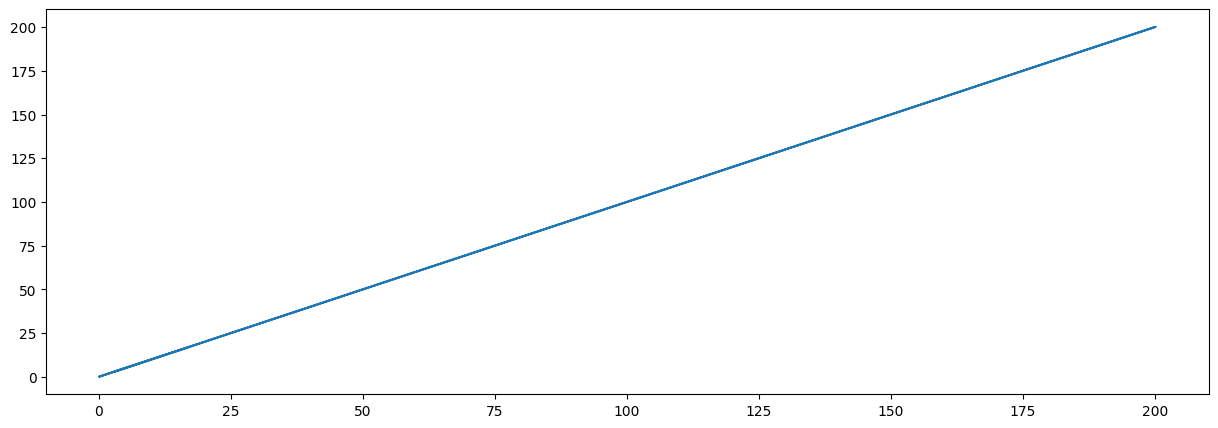

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(df_dropped["diff_icu_in_days"], df_dropped["los_icu"])
# plt.plot(np.arange(len(df_dropped)), df_dropped["los_icu"])
plt.show()

The fact that plotting the columns respectively on the x and y axis and it resulting to a linear graph. Leads us to believe they are the same.

### Data Understanding

Lets start by checking the average time spent in the icu overall (not selecting age groups etc)

In [9]:
df_dropped["los_icu"].mean()

np.float64(3.711253241371632)

Overall we know now that patients spent an average of 4 days in the ICU, but to clearify this further lets group by age and see if we can get a better indication.

[https://www.statcan.gc.ca/en/concepts/definitions/age2]

The source above gives as a few age groupings which are: Children (0-14), Youth (15-24), Adults (25-64), Seniors (65>)

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2960\3141087279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["age_group"] = pd.cut(df_dropped['age'], bins=bins, labels=labels, right=True)


age_group
child     0.929166
youth     0.947222
adult     1.659374
senior    1.690277
Name: los_icu, dtype: float64


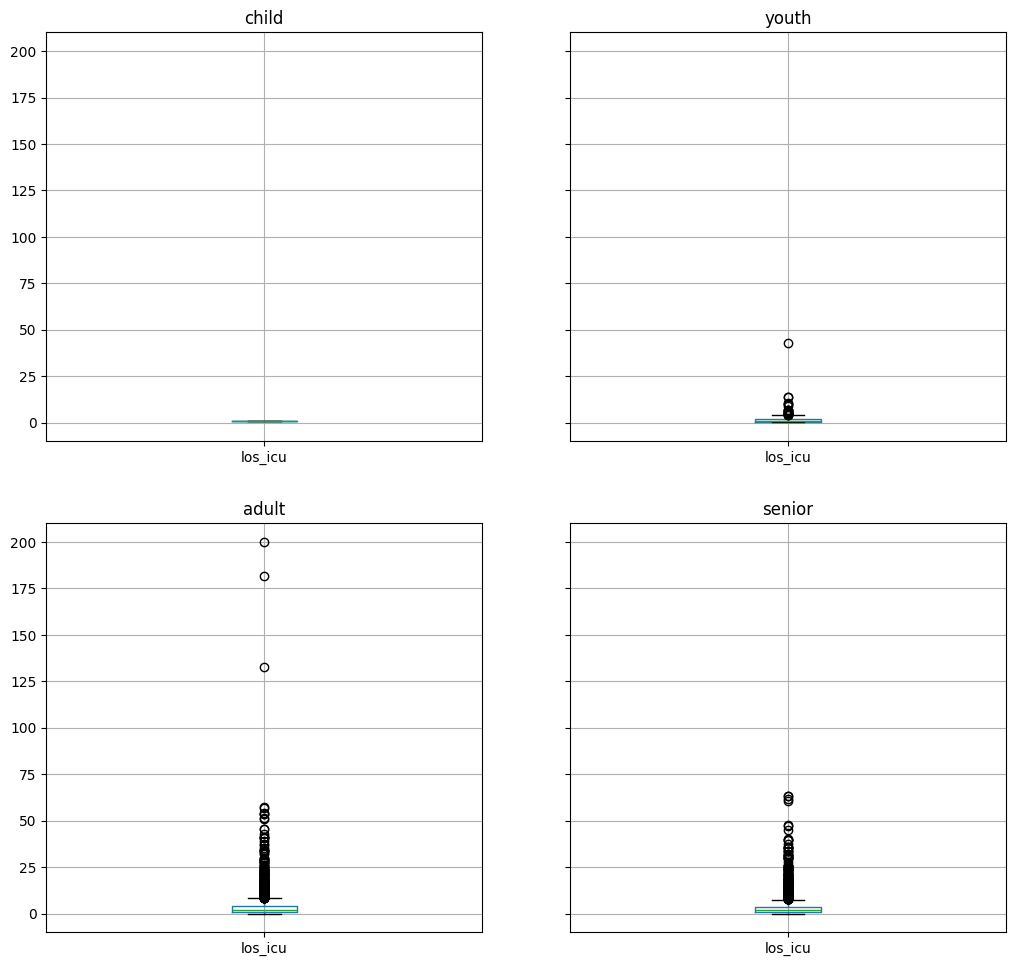

In [10]:
bins = [0, 14, 24, 64, 1000]
labels = ['child', 'youth', 'adult', 'senior']
df_dropped["age_group"] = pd.cut(df_dropped['age'], bins=bins, labels=labels, right=True)

grouped_df = df_dropped.groupby(by="age_group", observed=True)
grouped_df[["los_icu"]].boxplot(figsize=(12, 12))
print(
grouped_df["los_icu"].median())

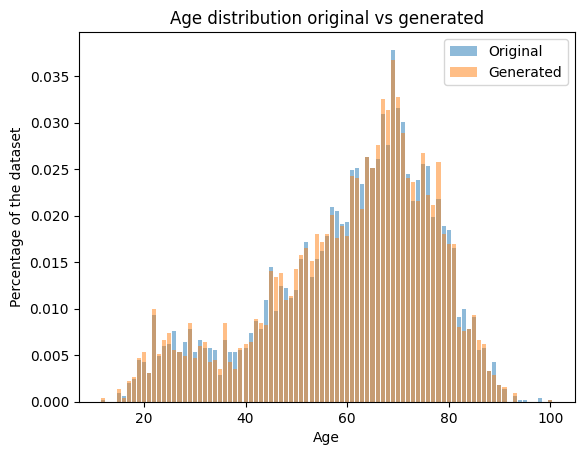

In [11]:
unique, counts = np.unique(df_dropped["age"], return_counts=True)
perc = []
for i in range(len(unique)):
    # print(unique[i], counts[i] / len(df_dropped["age"]))
    perc.append(counts[i] / len(df_dropped["age"]))

plt.bar(unique, perc, label="Original", alpha=0.5)
sample = np.random.choice(unique, p=perc, size=len(df_dropped["age"]))
unique2, counts2 = np.unique(sample, return_counts=True)
perc2 = []
for i in range(len(unique2)):
    # print(unique[i], counts[i] / len(df_dropped["age"]))
    perc2.append(counts2[i] / len(df_dropped["age"]))
plt.bar(unique2, perc2, label="Generated", alpha=0.5)
plt.title("Age distribution original vs generated")
plt.xlabel("Age")
plt.ylabel("Percentage of the dataset")
plt.legend()

Text(0, 0.5, 'Amount')

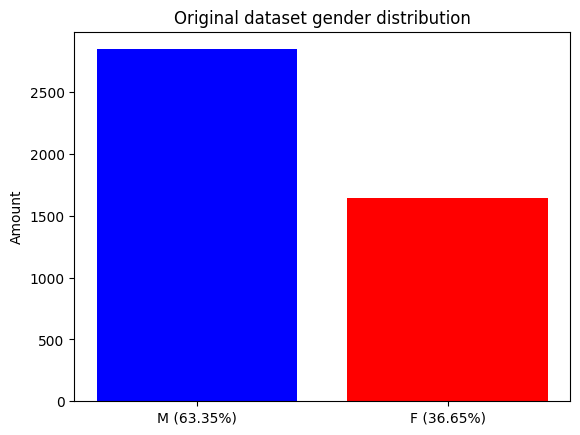

In [12]:
M_count = len(df_dropped[df_dropped["gender"] == "M"])
F_count = len(df_dropped[df_dropped["gender"] == "F"])

total = M_count + F_count

plt.title("Original dataset gender distribution")
plt.bar([f"M ({round(M_count / total * 100, 2)}%)", f"F ({round(F_count / total * 100, 2)}%)"], [M_count, F_count], color=['blue', 'red'])
plt.ylabel(("Amount"))

Text(0, 0.5, 'Amount')

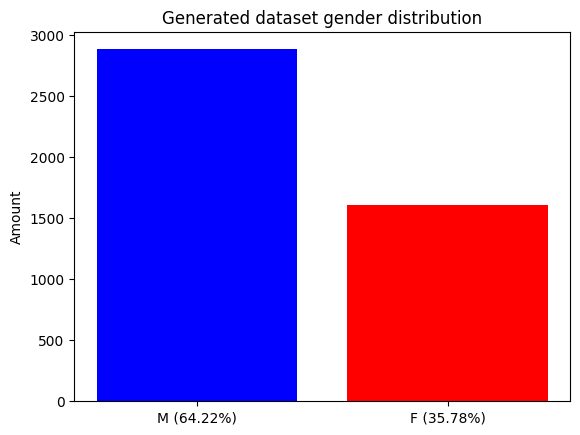

In [13]:
sample = np.random.choice(["M", "F"], p=[M_count/total, F_count/total], size=total)
M_count2 = len(np.argwhere(sample == "M"))
F_count2 = len(np.argwhere(sample == "F"))

plt.title("Generated dataset gender distribution")
plt.bar([f"M ({round(M_count2 / total * 100, 2)}%)", f"F ({round(F_count2 / total * 100, 2)}%)"], [M_count2, F_count2], color=['blue', 'red'])
plt.ylabel("Amount")

Next up is the distribution of planned and unplanned patients coming into the hospital. The column for this is `plan_adm` or planned admission in plain words. The possibilities for this column are either 0 for not being planned or 1 for a planned visit. This has been discussed earlier in this notebook. We will first plot the distribution shown from the original dataset and after generate a dataset based on the percentages gained from the original dataset. 

Text(0, 0.5, 'Amount')

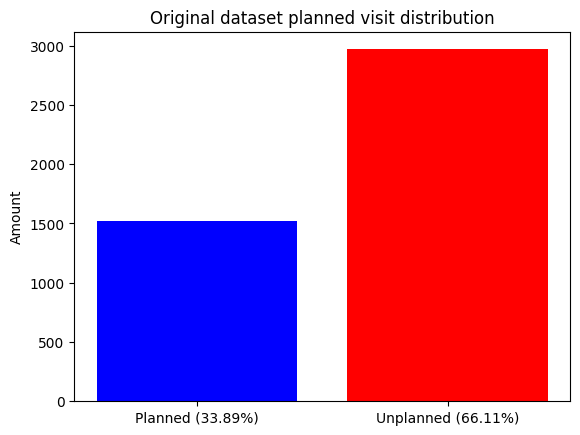

In [14]:
P_count = len(df_dropped[df_dropped["plan_adm"] == 1])
U_count = len(df_dropped[df_dropped["plan_adm"] == 0])

total = P_count + U_count

plt.title("Original dataset planned visit distribution")
plt.bar([f"Planned ({round(P_count / total * 100, 2)}%)", f"Unplanned ({round(U_count / total * 100, 2)}%)"], [P_count, U_count], color=['blue', 'red'])
plt.ylabel(("Amount"))

Text(0, 0.5, 'Amount')

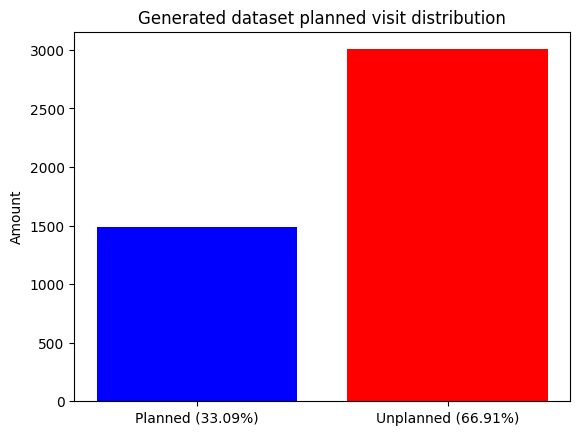

In [15]:
sample = np.random.choice([1, 0], p=[P_count/total, U_count/total], size=total)
P_count2 = len(np.argwhere(sample == 1))
U_count2 = len(np.argwhere(sample == 0))

plt.title("Generated dataset planned visit distribution")
plt.bar([f"Planned ({round(P_count2 / total * 100, 2)}%)", f"Unplanned ({round(U_count2 / total * 100, 2)}%)"], [P_count2, U_count2], color=['blue', 'red'])
plt.ylabel("Amount")

With all these distributions we are now able to create a function that will create a random patient for us and have it fit within the distribution of the dataset. 

I can hear you thinking, as we used the distributions of the entire dataset we might not get a correct view on for example the planned and unplanned distribution if we first group by gender or age for example. However this is a simplification step we choose to not put to much effort in to generating 100% accurate patients (according to the dataset).

In [16]:
def create_patients(size = 1) -> np.array:
    opnames_df = pd.read_csv("../opnames.csv", delimiter=",")
    # Clean the dataset
    opnames_df_dropped = opnames_df.dropna(subset=["los_icu"])
    # Calculate age percentages
    age_unique, age_counts = np.unique(opnames_df_dropped["age"], return_counts=True)
    age_percentage = []
    for i in range(len(age_unique)):
        age_percentage.append(age_counts[i] / len(opnames_df_dropped["age"]))
    
    patient_ages = np.random.choice(age_unique, p=age_percentage, size=size)

    # Get patient gender
    M_count = len(opnames_df_dropped[opnames_df_dropped["gender"] == "M"])
    F_count = len(opnames_df_dropped[opnames_df_dropped["gender"] == "F"])

    total = M_count + F_count
    patient_genders = np.random.choice(["M", "F"], p=[M_count/total, F_count/total], size=size)

    # Get patient planned or unplanned
    P_count = len(df_dropped[df_dropped["plan_adm"] == 1])
    U_count = len(df_dropped[df_dropped["plan_adm"] == 0])

    total = P_count + U_count
    patient_planned = np.random.choice([1, 0], p=[P_count/total, U_count/total], size=size)

    patients = []
    for i in range(size):
        patients.append({
            "age": patient_ages[i],
            "gender": patient_genders[i],
            "planned": patient_planned[i]
        })
    return np.array(patients)


patients = create_patients(size=4500)


## 2. Bed Capacity and Spawn Rate

In this part of the user (patient) generation we take a dive into the bed capacity data and the general 'spawn' rate of patients.

In [79]:
opnames = pd.read_csv("../data/Data2005_2016.csv", delimiter=";")
opnames = opnames.dropna(subset=["LOS_CORR"])
opnames["ADM_CORR"] = pd.to_datetime(opnames["ADM_CORR"], format="%d-%m-%Y %H:%M")
opnames["DIS_CORR"] = pd.to_datetime(opnames["DIS_CORR"], format="%d-%m-%Y %H:%M")
opnames["ADM_CORR_date"] = opnames["ADM_CORR"].dt.date
opnames["DIS_CORR_date"] = opnames["DIS_CORR"].dt.date
opnames.head()


,nice_age,ref_spec,SPEC,SPEC_GROUP,plan_adm,ADM_CORR,ADD-BED,DIS_CORR,DIS-BED,LOS_CORR,ADM_CORR_date,DIS_CORR_date
0,73,9.0,heelkunde,CHI,0,2004-11-24 18:49:00,1,2005-01-04 15:39:00,-1,"40,87",2004-11-24,2005-01-04
1,64,9.0,heelkunde,CHI,0,2004-11-24 22:13:00,1,2005-01-24 12:25:00,-1,"60,59",2004-11-24,2005-01-24
2,36,29.0,cardio-pulmonale chirurgie,CTC,0,2004-12-09 06:14:00,1,2005-01-05 13:29:00,-1,"27,30",2004-12-09,2005-01-05
3,68,9.0,heelkunde,CHI,0,2004-12-12 08:46:00,1,2005-01-08 11:15:00,-1,"27,10",2004-12-12,2005-01-08
4,56,12.0,neurochirurgie,NEU,0,2004-12-19 01:38:00,1,2005-01-03 14:30:00,-1,"15,54",2004-12-19,2005-01-03


In [80]:
sorted_opnames = opnames.sort_values(by=["ADM_CORR_date"])
sorted_opnames.head()

,nice_age,ref_spec,SPEC,SPEC_GROUP,plan_adm,ADM_CORR,ADD-BED,DIS_CORR,DIS-BED,LOS_CORR,ADM_CORR_date,DIS_CORR_date
0,73,9.0,heelkunde,CHI,0,2004-11-24 18:49:00,1,2005-01-04 15:39:00,-1,"40,87",2004-11-24,2005-01-04
1,64,9.0,heelkunde,CHI,0,2004-11-24 22:13:00,1,2005-01-24 12:25:00,-1,"60,59",2004-11-24,2005-01-24
2,36,29.0,cardio-pulmonale chirurgie,CTC,0,2004-12-09 06:14:00,1,2005-01-05 13:29:00,-1,"27,30",2004-12-09,2005-01-05
3,68,9.0,heelkunde,CHI,0,2004-12-12 08:46:00,1,2005-01-08 11:15:00,-1,"27,10",2004-12-12,2005-01-08
4,56,12.0,neurochirurgie,NEU,0,2004-12-19 01:38:00,1,2005-01-03 14:30:00,-1,"15,54",2004-12-19,2005-01-03


<Axes: xlabel='date'>

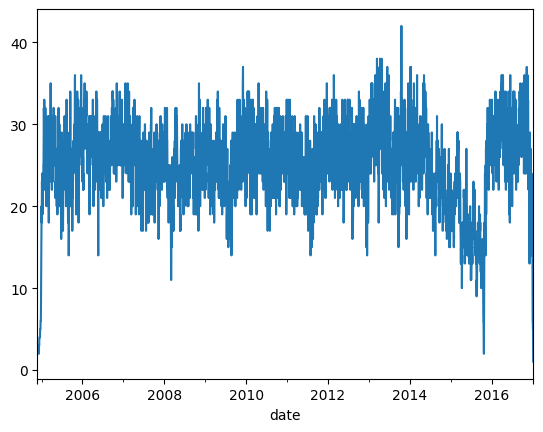

In [82]:
all_dates = []
for index, row in sorted_opnames.iterrows():
    dates = pd.date_range(start=row['ADM_CORR_date'], end=row['DIS_CORR_date'])
    all_dates.extend(dates)

beds_per_day = pd.DataFrame(all_dates, columns=['date'])
bed_occupancy = beds_per_day['date'].value_counts().sort_index()
bed_occupancy.plot.line()

In [87]:
opnames = pd.read_csv("../opnames.csv", delimiter=",")
opnames = opnames.dropna(subset=["los_icu"])
opnames["adm_icu"] = pd.to_datetime(opnames["adm_icu"])
opnames["dis_icu"] = pd.to_datetime(opnames["dis_icu"])
opnames["adm_icu_date"] = opnames["adm_icu"].dt.date
opnames["dis_icu_date"] = opnames["dis_icu"].dt.date
opnames.head()

,ref_spec,adm_icu,dis_icu,los_icu,age,gender,nice_ap4_score,icu_death,plan_adm,adm_icu_date,dis_icu_date
0,12,2015-10-17 20:22:00,2015-11-03 10:35:00,16.592361,51,F,28,0,0.0,2015-10-17,2015-11-03
1,12,2015-10-28 23:15:00,2015-11-05 14:46:00,7.646527,54,M,74,0,0.0,2015-10-28,2015-11-05
2,9,2015-10-30 14:40:00,2015-11-02 14:18:00,2.984722,77,M,63,0,0.0,2015-10-30,2015-11-02
3,21,2015-10-31 13:24:00,2015-11-16 14:06:00,16.029166,70,F,84,0,0.0,2015-10-31,2015-11-16
5,3,2015-11-24 00:21:00,2015-12-03 13:21:00,9.541666,45,M,44,0,0.0,2015-11-24,2015-12-03


<Axes: xlabel='date'>

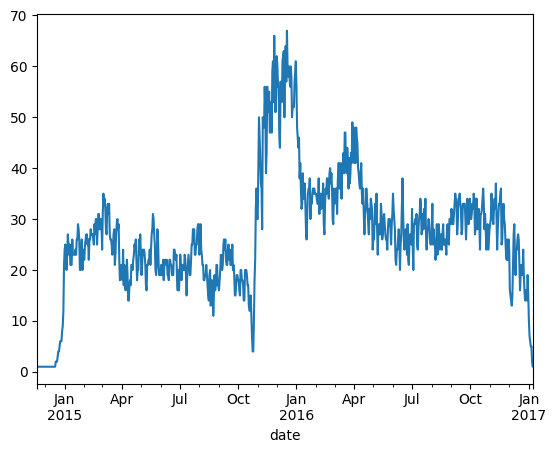

In [89]:
all_dates = []
for index, row in opnames.iterrows():
    dates = pd.date_range(start=row['adm_icu_date'], end=row['dis_icu_date'])
    all_dates.extend(dates)

beds_per_day = pd.DataFrame(all_dates, columns=['date'])
bed_occupancy = beds_per_day['date'].value_counts().sort_index()
bed_occupancy.plot.line()

In [175]:
opnames = pd.read_csv("../data/Data2005_2016.csv", delimiter=";")
opnames = opnames.dropna(subset=["LOS_CORR"])
opnames["ADM_CORR"] = pd.to_datetime(opnames["ADM_CORR"], format="%d-%m-%Y %H:%M")
opnames["DIS_CORR"] = pd.to_datetime(opnames["DIS_CORR"], format="%d-%m-%Y %H:%M")
opnames["ADM_CORR_date"] = opnames["ADM_CORR"].dt.date
opnames["DIS_CORR_date"] = opnames["DIS_CORR"].dt.date
opnames["adm_year"] = opnames["ADM_CORR"].dt.year
opnames["adm_day_of_year"] = opnames["ADM_CORR"].dt.dayofyear
opnames = opnames[opnames["adm_year"] != 2004]
opnames.head()


,nice_age,ref_spec,SPEC,SPEC_GROUP,plan_adm,ADM_CORR,ADD-BED,DIS_CORR,DIS-BED,LOS_CORR,ADM_CORR_date,DIS_CORR_date,adm_year,adm_day_of_year
18,25,9.0,heelkunde,CHI,0,2005-01-01 04:21:00,1,2005-01-01 11:50:00,-1,"0,31",2005-01-01,2005-01-01,2005,1
19,78,3.0,cardiologie,INTCAR,0,2005-01-01 23:45:00,1,2005-01-03 14:27:00,-1,"1,61",2005-01-01,2005-01-03,2005,1
20,90,2.0,inwendige geneeskunde,INTCAR,0,2005-01-02 00:35:00,1,2005-01-02 13:36:00,-1,"0,54",2005-01-02,2005-01-02,2005,2
21,37,12.0,neurochirurgie,NEU,0,2005-01-02 10:07:00,1,2005-01-24 10:32:00,-1,"22,02",2005-01-02,2005-01-24,2005,2
22,58,4.0,longziekten,INTCAR,0,2005-01-02 17:43:00,1,2005-01-10 14:05:00,-1,"7,85",2005-01-02,2005-01-10,2005,2


Text(0.5, 0, 'Day in year')

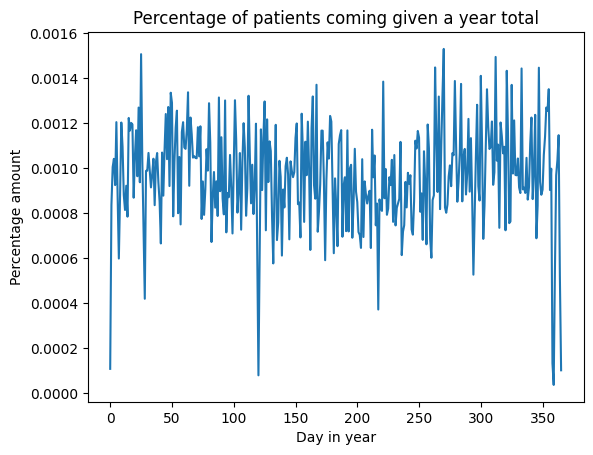

In [176]:
all_day_of_year_grouped_opnames = opnames.groupby(["adm_year", "adm_day_of_year"])
all_year_totals = all_day_of_year_grouped_opnames.size().groupby(level=0).sum()

opnames = opnames[opnames["plan_adm"] == 1]


day_of_year_grouped_opnames = opnames.groupby(["adm_year", "adm_day_of_year"])

percentages = day_of_year_grouped_opnames.size() / all_year_totals

groups = np.sort(list(set([x[0] for x in percentages.keys()])))
percentages_sum = None
for group in groups:
    if(type(percentages_sum) == type(None)):
        percentages_sum = percentages.get(group)
    else:
        percentages_sum = percentages_sum.add(percentages.get(group), axis=0, level=0, fill_value=0)
    
    


percentages_sum = percentages_sum / len(groups)
plt.plot(range(0, len(percentages_sum)), percentages_sum)
plt.title("Percentage of patients coming given a year total")
plt.ylabel("Percentage amount")
plt.xlabel("Day in year")
